In [100]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# Homework 6: Exploring Uber and Lyft Prices in Boston

Name: Elizabeth Girling, Trevor Fox

Student ID: 490674

Collaborators:


## Instructions

This homework is an _open-ended midterm project_ for our class. 

We will be using the techniques and approaches introduced in the first half of the semester:

* **[M0] Python for DS**
* **[M1] The DS and ML Workflows**
* **[M2] Exploratory Data Analsyis**
* [M3] Sentiment Analysis (if applicable - depends on problem/dataset)
* [M4] Linear Regression (if applicable - depends on problem/dataset)
* [M5] Linear Classification (if applicable - depends on problem/dataset)
* **[M6]** Learning Principles and **Ethical Thinking for DS**

The main focus of this project is on the first three modules [M0]-[M2], as well as the ethical consderations for DS from [M6]. In particular, it will be helpful to review **Lab 2 & hw2 (Analyzing the MoMA Data)** first. Most of the things you will do in this midterm project are explained in `Lab2` and `hw2`. Then, review the other labs and hws to recap the  general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In gernal, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the EDA/DS workflow and you will need to fill in the analysis and structure as you go.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [101]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'Trevor Fox and Elizabeth Girling'

### Submission instructions
* Submit this Python notebook, including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. Introduction

For our midterm project this semester, we'll take a look at data for numerous Lyft and Uber rides in Boston and their prices (https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma). Our goal will be to use this dataset to gain some insight about characteristics of rides and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 
7. **Critically review** our workflow and discuss ethical concerns

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later. 
Download the data from the given source/link (cf. `README.md`) and be sure to save the data in a folder called `data` under the `utility` directory.

<!-- BEGIN QUESTION -->

### Problem 1

Let's take a look at the files in `utility/data` and think about what we can and will need to do with it.

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

The data comes from uber and lyft receipts from boston. The data is formulated by a grad student at UNO. 
The data is collected for the period of 11-26-2018 to 12-18-2018. The data set has 57 features that are all related 
to ubers and lyfts. The features are mostly numerical but some are summaries which include words describing the feature.
it is not readily available how the data was obtained on Kaggle.
Month is the feature that describes whether the ride is an uber or lyft.


In [102]:
from os.path import exists


data_dir = 'data'

assert exists(f'{data_dir}/rideshare_kaggle.csv'), "error"

import pandas as pd

data = pd.read_csv(f'{data_dir}/rideshare_kaggle.csv')

In [103]:
data.head()
print(data.columns)

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

These are the features of the data. There are a bunch of features we won't need.

In [104]:
data


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


The data looks pretty standard. There are numerical, categorical, and binary data types

### Problem 2

Let's do some data wrangling. 

**Write up!** Considering your description of the dataset from [Problem 1](#Problem-1), how should we clean this data?

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You may add comments or markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

First, we clean the data, or the drop the data with the features we don't want.

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from utility.util import configure_plots
configure_plots()
#Find correlation between surge multiplyer and time.

#We first dropped the data that we do not need. 
surgem = data['surge_multiplier']
time = data['timestamp']
price = data['price']
size = surgem.sum()
cleanData = data.drop(['id', 'timezone',
       'source', 'destination',  'product_id', 'name', 
       'latitude', 'longitude', 
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 
       'temperatureHighTime',  'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 
       'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'], axis = 1)


lyftdata= cleanData[cleanData['cab_type'] == 'Lyft']

uberdata= cleanData[cleanData['cab_type'] == 'Uber']


In [106]:
#Next we explored the data size and how it compared to the sum of the values within.
print(size)
print(len(surgem))


702683.75
693071


In [107]:

#This function could be useful to visual data where there is correlation.

def scatter_columns(df, first_column, second_column):
    '''
    Creates a scatter plot of two columns of a data frame.
    '''

    plt.scatter(df[first_column], df[second_column], marker = 'o')
    plt.title("Correlation Between " + first_column + " and " + second_column)
    plt.xlabel(first_column)
    plt.ylabel(second_column)
    
    return


### Problem 3

**Do this!** Now that we cleaned up our data, we are ready to look into it. In this problem, we want to profile our data and explore its variables.

> **Hint**: Note that the way some data is stored does not necesarily mean that each column should correspond to a seperate variable. Feel free to define your own variables based on the input data. Looking at the dataset documentation might be helpful to figure out meaningful representations. Also note that there are no right or wrong representations here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variable representations). Again, you might want to iterate over this step again later after doing some more exploration. 

> **Hint**: Recall from Lab 2, this step usually involves computing summary statistics and basic plots _where applicable_. Try plotting some of the data (with appropriate plots; remember the lecture content - some plots introduced in there ( we did not yet use in the lab or hw) could be useful). Then, highlight a few of the more interesting ones and discuss why you thought they were interesting — for both our sakes, **please only include the most interesting ones** in your actual submission!!  Again note that there are no right or wrong features to choose here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variables to include). Just be sure to make a selection. You will not receive any credit by simply plotting everything!  

*Grading Note*: Your work will be graded for _creativity_ and _aesthetics_. Be creative in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures.* 

Once again, we have provided a _free_ cell for you to use; make as many as you need. Use text/markdown cells to describe what you are doing and what your findings are. 

To compare correlations, we created a heatmap from the clean data

Text(0.5, 1.0, 'Uber/Lyft Data: Correlation Matrix')

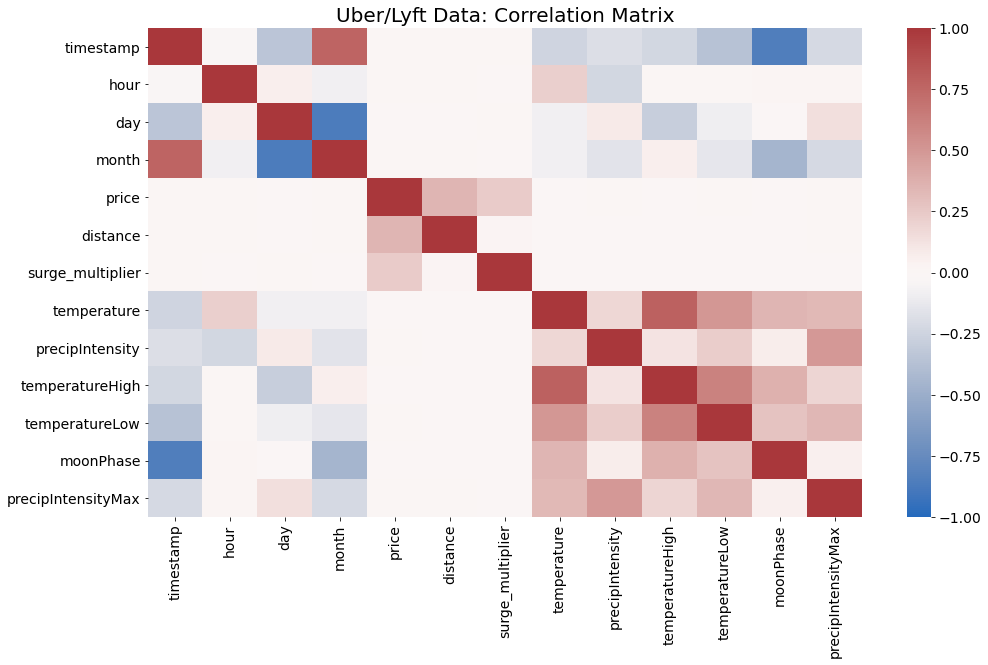

In [108]:
import seaborn as sns

sns.heatmap(cleanData.corr(), cmap=sns.cm.vlag, vmin=-1)
plt.xticks(rotation=90)
plt.title('Uber/Lyft Data: Correlation Matrix')

Here is a heatmap of data for comparison

Text(0.5, 1.0, 'Uber/Lyft Data: Correlation Matrix')

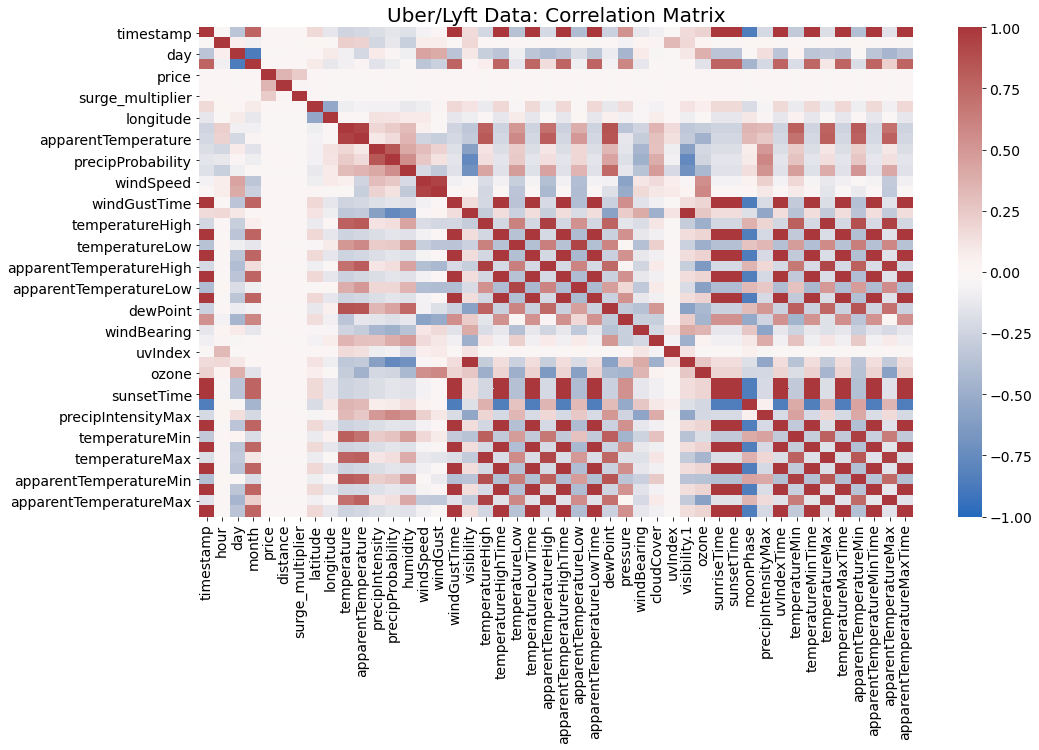

In [109]:
sns.heatmap(data.corr(), cmap=sns.cm.vlag, vmin=-1)
plt.xticks(rotation=90)
plt.title('Uber/Lyft Data: Correlation Matrix')

We visualized the surge multiplier data to try to find a correlation between price and surge multiplier.

Text(0.5, 0, 'Multiplier Value')

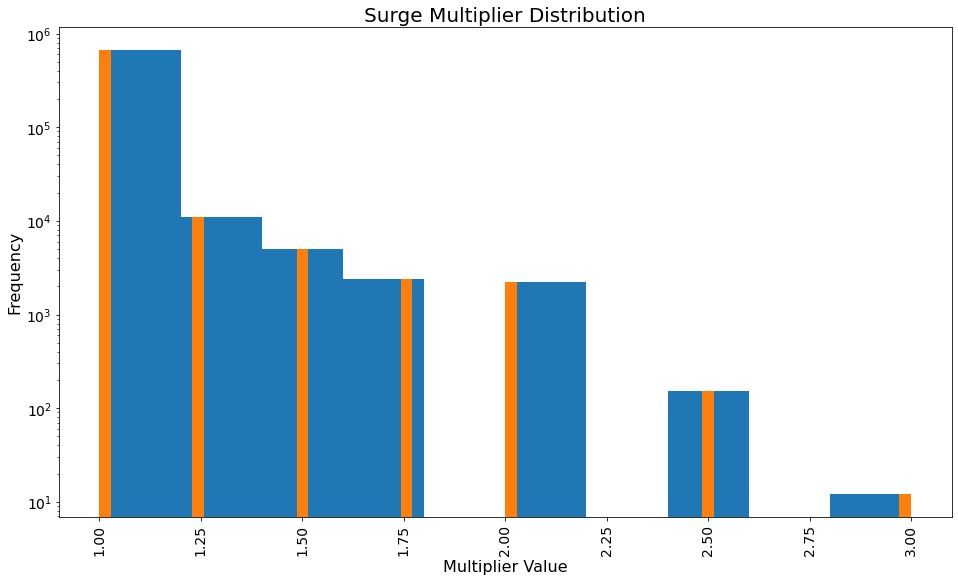

In [110]:
#We then visualized the data so we knew what values we were working with
plt.hist(surgem)
plt.hist(surgem, bins=70, log = 0.5)
plt.title("Surge Multiplier Distribution")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.xlabel("Multiplier Value")



Text(0.5, 1.0, 'Uber/Lyft Data: Correlation Matrix')

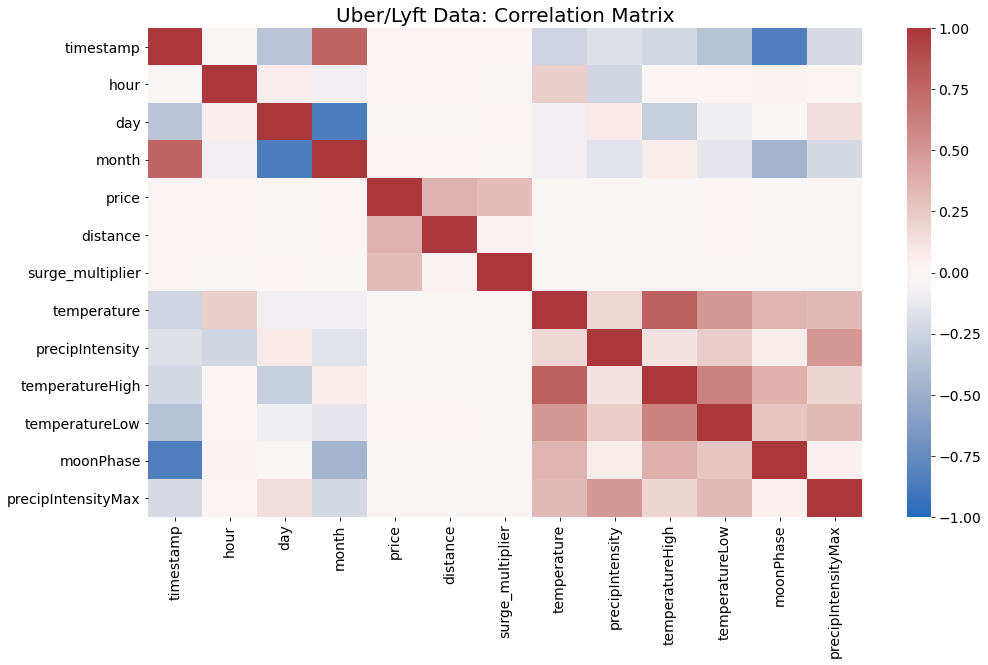

In [111]:
sns.heatmap(lyftdata.corr(), cmap=sns.cm.vlag, vmin=-1)
plt.xticks(rotation=90)
plt.title('Uber/Lyft Data: Correlation Matrix')

Text(0.5, 1.0, 'Uber/Lyft Data: Correlation Matrix')

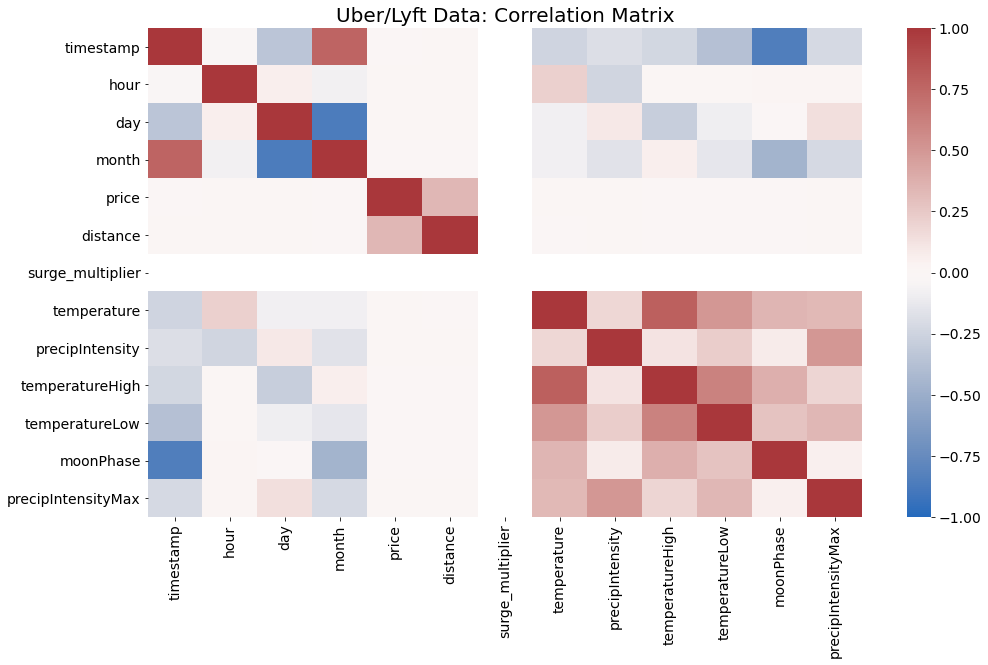

In [112]:
sns.heatmap(uberdata.corr(), cmap=sns.cm.vlag, vmin=-1)
plt.xticks(rotation=90)
plt.title('Uber/Lyft Data: Correlation Matrix')

This is a good idea, but realized from the two heatmaps above that uber doesn't keep data for the surge multiplier.
Since the feature didn't exist for Uber, we shifted our focus to moonphase.

## 3. Asking the Hard Questions

By now we should know all of the ins and outs about this dataset (right?). Let's dive a little deeper into it and see if we can find anything interesting.

### Problem 4

As you worked through the initial data processing and understanding phase, did anything catch your interest? Let's formulate some questions and hypotheses that you could explore in depth.

**Write-up!** Formulate and describe a question you have/want to investigate. Then, formulate and describe a hypothesis that can (possibly) answer it. What inspired your idea (provide specifics from [the last section](#2.-Getting-Familiar-with-the-Data), if any)? How can you use the data to support or reject your hypothesis?

> **Hint**: Your question/hypothesis might be something that you are personally interested in or something that you think might lead to a product or service for users/customers. You might want to think about something that could help others in making decisions, etc.

*Grading Note: Your work will be graded for _creativity_. Be creative in the questions you ask/hypothesis you pose.* 

Question: Are lyfts and ubers more expensive during certain phases of moon, if so is Uber more expensive than Lyft or vise versa?
Hypothesis: As the moon becomes more full (closer to 1) the price of lyfts and ubers will decrease because as the moon becomes fuller it will ommit more light and people will be more comfortable walking at night and ubers will be more expensive on average. 

Secondary question: How to the prices of Uber and Lyft compare to each other?
Hypothesis: Uber is more expensive, on average, than Lyft because it is a larger company that can afford to charge more.

### Problem 5

**Do this!** Let's explore your hypothesis. Find evidence from the data that supports or refutes your hypothesis and present it — recall that as a data scientist, one of your goals is to discover and communicate your results to your audience, _me_. The more thorough your analysis, the better!

> **Hint**: Even though we focus on EDA here, you may include some predictive modeling here as well. 

Here's yet another _free_ cell; use as many as you need.

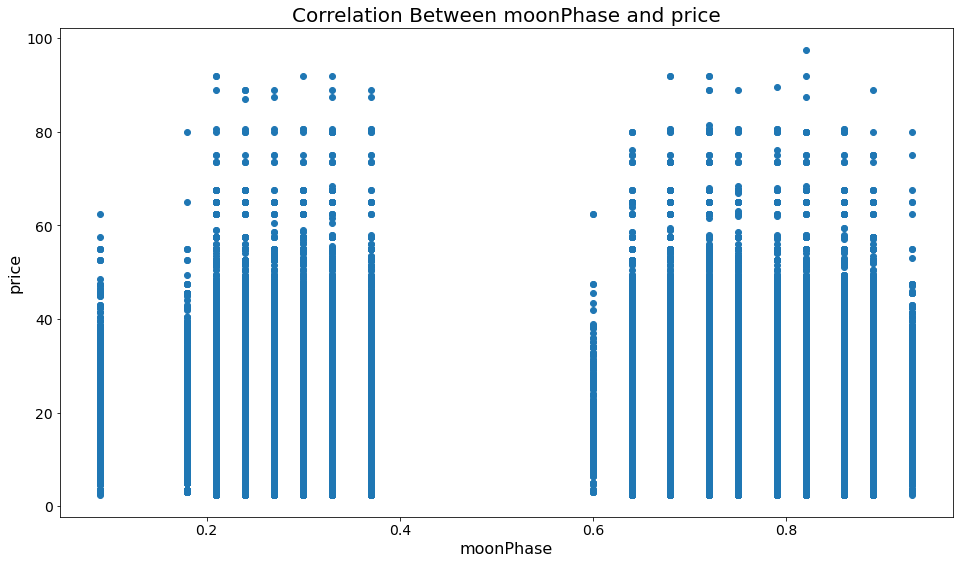

In [113]:
scatter_columns(cleanData, 'moonPhase', 'price')

In [114]:
moonData = cleanData['moonPhase']
priceData = cleanData['price']

Text(0.5, 0, 'Moon Phase')

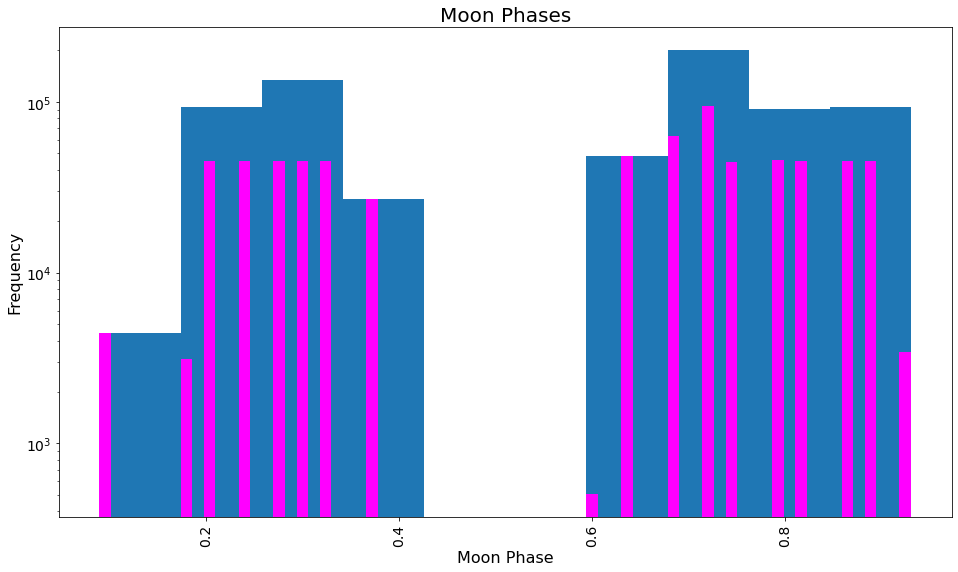

In [115]:
plt.hist(cleanData['moonPhase'])
plt.hist(cleanData['moonPhase'], bins=70, log = 0.5, color="Magenta")
plt.title("Moon Phases")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.xlabel("Moon Phase")

In [116]:
first = cleanData[cleanData['moonPhase'] < 0.25]
second = cleanData[cleanData['moonPhase'] > 0.25]
second = cleanData[cleanData['moonPhase'] < 0.50]
third = cleanData[cleanData['moonPhase'] > 0.50]
third = cleanData[cleanData['moonPhase'] < 0.75]
fourth = cleanData[cleanData['moonPhase'] > 0.75]
mean1 = first['price'].mean()
mean2 = second['price'].mean()
mean3 = third['price'].mean()
mean4 =fourth['price'].mean()
meanArray = [mean1, mean2, mean3, mean4]

([<matplotlib.axis.XTick at 0x2d383ddfdc8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

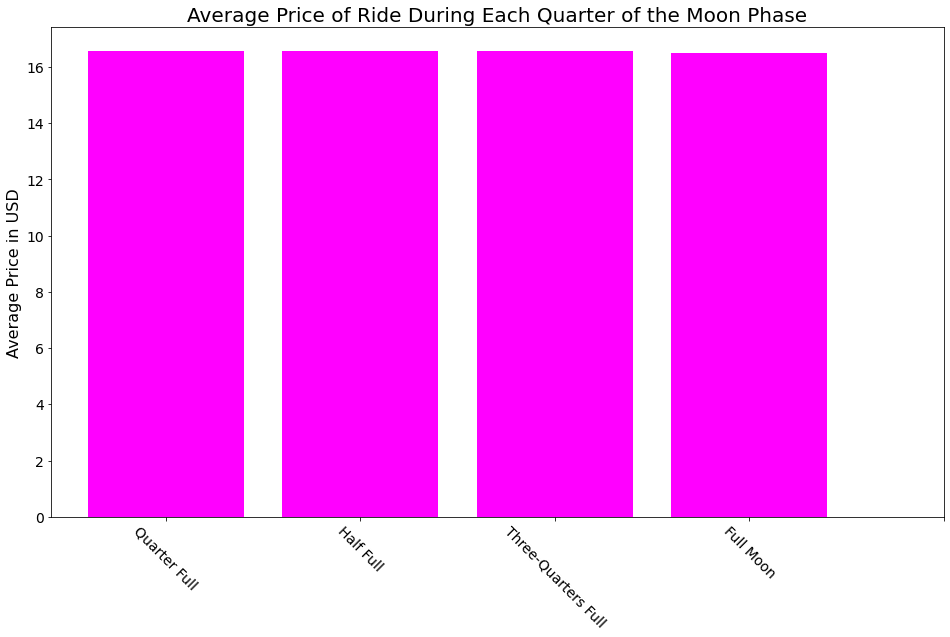

In [117]:
plt.bar(["Quarter Full","Half Full","Three-Quarters Full","Full Moon"],meanArray, color = "Magenta" )
plt.title("Average Price of Ride During Each Quarter of the Moon Phase")
plt.ylabel("Average Price in USD")
plt.xticks(np.arange(0, 5, step=1), rotation=-45)

([<matplotlib.axis.XTick at 0x2d38413f7c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

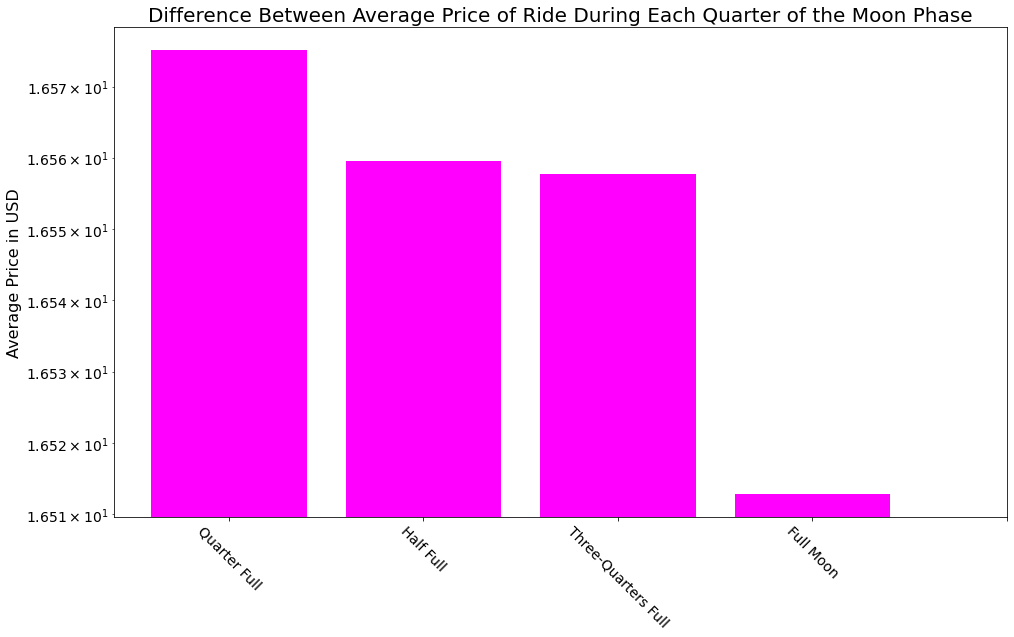

In [118]:
plt.bar(["Quarter Full","Half Full","Three-Quarters Full","Full Moon"],meanArray, color = "Magenta", log = 0.3 )
plt.title("Difference Between Average Price of Ride During Each Quarter of the Moon Phase")
plt.ylabel("Average Price in USD")
plt.xticks(np.arange(0, 5, step=1), rotation=-45)

There was a negative correlation between price and moonphase, but it wasn't very significant

We then shifted our focus towards comparing the average ride price of Uber and Lyft

Difference of Total Number of Rides: 78255


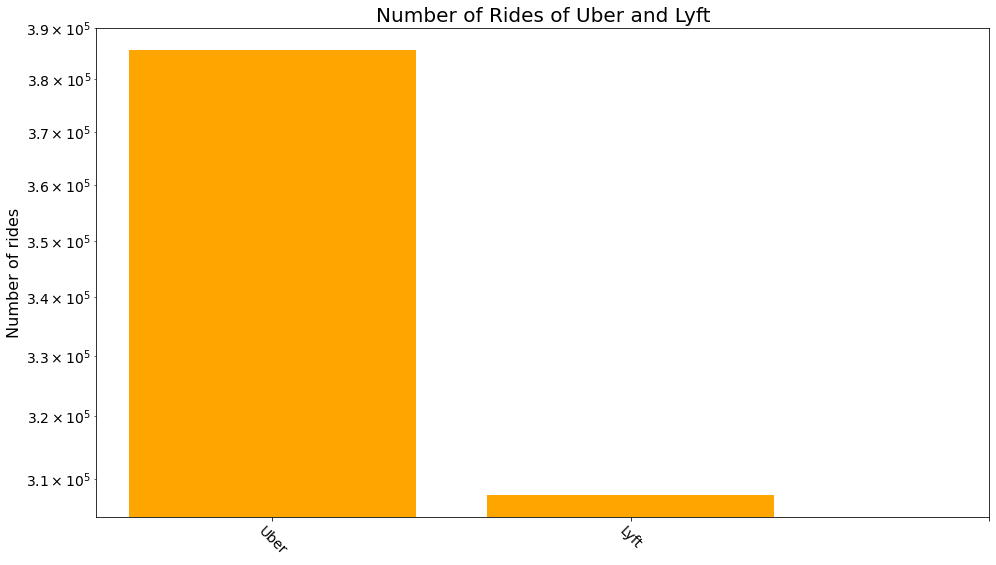

In [119]:
# Total number of rides Uber vs Lyft

plt.bar(["Uber", "Lyft"], [len(uberdata), len(lyftdata)], color = "Orange", log = 0.3 )
plt.title("Number of Rides of Uber and Lyft")
plt.ylabel("Number of rides")
plt.xticks(np.arange(0, 3, step=1), rotation=-45)

differenceRides = len(uberdata)-len(lyftdata)
print("Difference of Total Number of Rides: " + str(differenceRides))

There is more data for Uber than for Lyft with Uber having 78255 more data points that Lyft. 
Now to look at the average price of each

([<matplotlib.axis.XTick at 0x2d385176d48>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

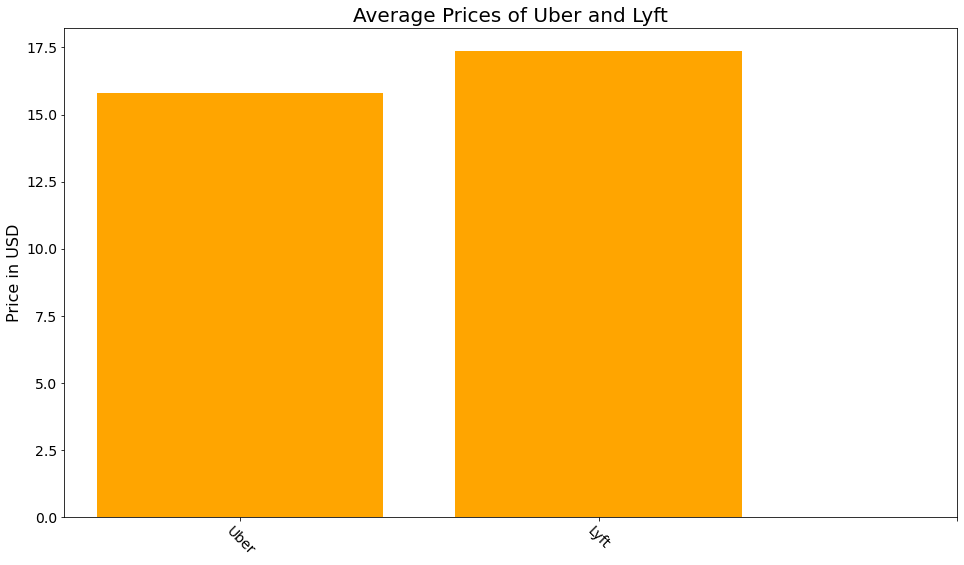

In [120]:
# Total price of rides Uber vs Lyft
meanUberPrice = uberdata['price'].mean()
meanLyftPrice = lyftdata['price'].mean()


plt.bar(["Uber", "Lyft"], [meanUberPrice, meanLyftPrice], color = "Orange")
plt.title("Average Prices of Uber and Lyft")
plt.ylabel("Price in USD")
plt.xticks(np.arange(0, 3, step=1), rotation=-45)

From this data, it appears that Lyft is, on average, more expensive than Uber. 
But distance of the ride and price are positively correlated. 
This brings up the question: Do Lyft rides also have a greater distance, on average?

([<matplotlib.axis.XTick at 0x2d3882317c8>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

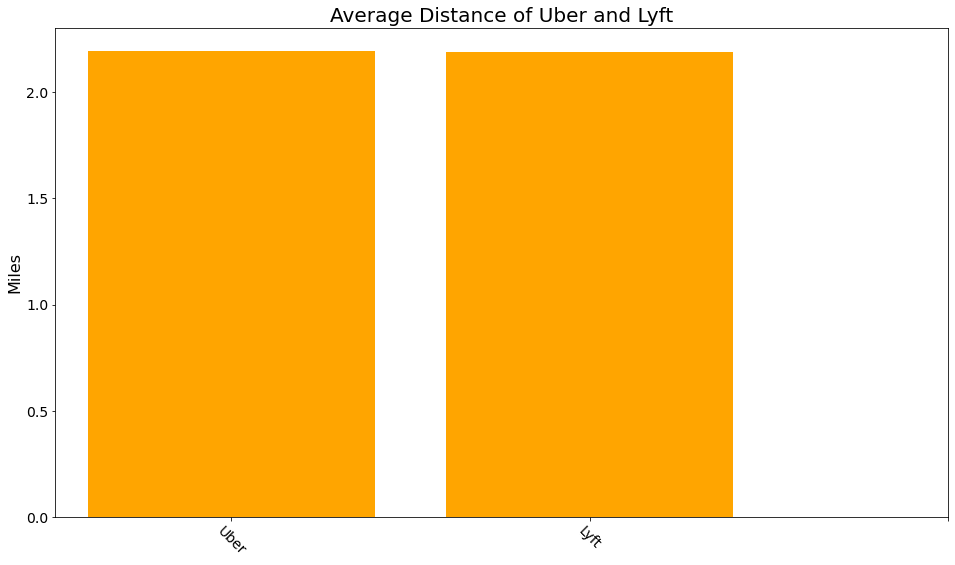

In [121]:
# Average distance of rides Uber vs Lyft
meanUberDistance = uberdata['distance'].mean()
meanLyftDistance = lyftdata['distance'].mean()


plt.bar(["Uber", "Lyft"], [meanUberDistance, meanLyftDistance], color = "Orange")
plt.title("Average Distance of Uber and Lyft")
plt.ylabel("Miles")
plt.xticks(np.arange(0, 3, step=1), rotation=-45)

It appears that Ubers and Lyfts has a similar average distance per ride.
We can now make a histogram comparing the average price per mile for Uber and Lyft 

([<matplotlib.axis.XTick at 0x2d389d6ff08>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

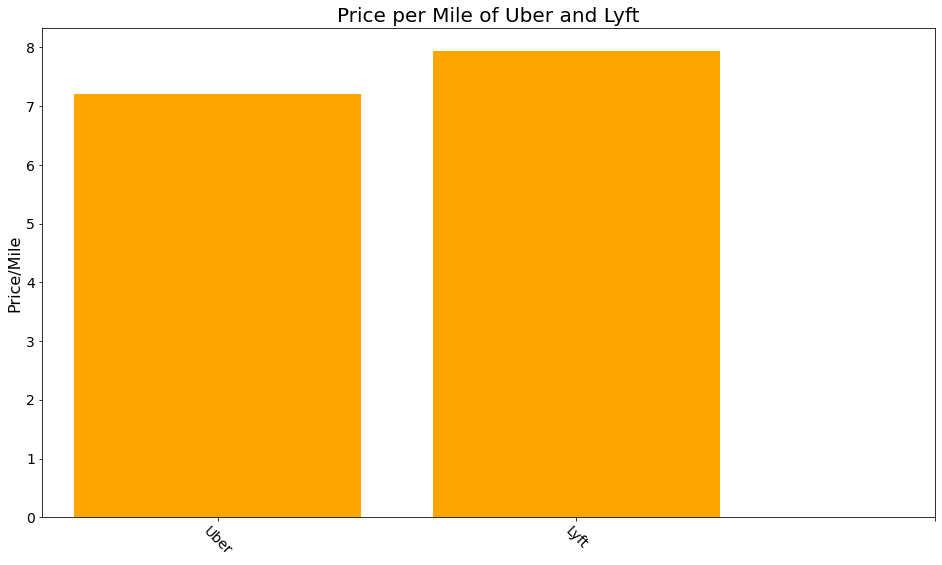

In [122]:
# Price per mile of rides Uber vs Lyft


plt.bar(["Uber", "Lyft"], [meanUberPrice/meanUberDistance, meanLyftPrice/meanLyftDistance], color = "Orange")
plt.title("Price per Mile of Uber and Lyft")
plt.ylabel("Price/Mile")
plt.xticks(np.arange(0, 3, step=1), rotation=-45)

As seen from the histogram above, Lyft has a higher price per mile.
As observed previously, Uber has 78255 more data points that Lyft, meaning the Lyft data is more easily affected by outliers.
So does the lyft data have more outliers greater than the mean than the Uber data, resulting in a higher price?

Text(0.5, 0, "['1 = Uber', '2 = Lyft']")

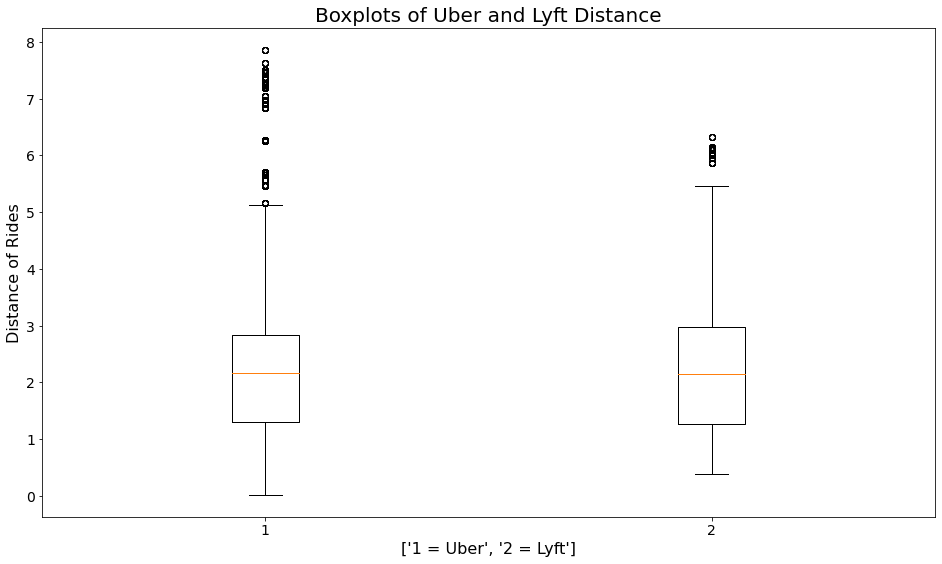

In [123]:
# To answer this question, we make a boxplot of the Uber and Lyft distance.


# Distance
plt.boxplot((uberdata['distance'], lyftdata['distance']))
plt.title("Boxplots of Uber and Lyft Distance")
plt.ylabel("Distance of Rides")
plt.xlabel(["1 = Uber", "2 = Lyft"])


As we can see from the boxplot above, Ubers have a greater amount of outliers greater than the mean for distance.
There are more data points for Uber, but Uber also has many, many more outliers, far more outliers than the differenc
in the number of data points would suggest

### Problem 6

**Write up!** Did you find anything interesting in [Problem 5](#Problem-5)? If you did, tell me about it. If you don't think you found anything interesting, keep looking. 

> **Hint**: Provide links to key figures in your discussion. See [this StackOverflow question](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown) for details.

First, we explored the variable of surge multiplier and price as shown in our Surge Multiplier Distribution histogram. Unfortunatley, there wasn't a surge multiplier in all of the data for Uber, so we decided to base our findings on other variable. We chose moonphase becuase we wondered if there was a strong correlation between the price of an Uber or Lyft and the amount of light at night. If there was a positive correlation, this could mean that Uber and Lyft were taking advantage of the consumer by charging them more when they are in more dangerous situations when it is darker out. Luckily, there was a slight negative correlation between moonphase and price, but the correlation was so slight that it was negligible as seen in our Difference Between Average Price of Ride During Each Quarter of the Moon Phase bar plots. We then shifted focus to the cab type variable, which told us if the ride was Uber or Lyft. We focused on the differencers in price between the two companies, and why there might be a difference. First, we looked at the raw differences in price, as seen in our Average Prices of Uber and Lyft bar graph, and saw that on average, Lyft rides were more expensive than Uber rides. To try to figure out why this is, we saw that there were significantly more Uber data points than Lyft data points in our Number of Rides of Uber and Lyft bar plot. This brings up the question of if Lyft rides are more expensive on average and have less data points, are they more expensive because of a few outliers in the data? We then graphed box plots showing that this is not the case, and Uber had way more outliers above the mean than Lyft. We then concluded that the average cost per mile of Uber is lower than the average price per mile of Lyft in our Price per Mile of Uber and Lyft bar graph.

### Problem 7
One last step that we shouldn't skip is reviewing both our data analysis approach and also the data acquisition method. 

**Write up!** Are there any shortcommings and/or **ethical issues** related to the way you used this data or formed your conclusions?
* Who are the stakeholders?
* How could someone other than yourself be impacted by any ethical issues arising from your analysis/work/product?
* Can you propose a way to resolve the issue(s)?

A fair amount of features could be used to create ethical concerns. One concern we focused on was the moonphase and the price of the ride. A rideshare company could use data for the number of rides during different phases of the moon and conclude that they should charge more when it is lighter out because of the increase of rides because of safety at this time. We made sure not to use this data to raise ethical concerns with the goal of ensuring the consumer is not being taken advantage by the corporation. Zin this case, the stakehoders are the customers of Uber and Lyft. From our data comparing the prices between Uber and Lyft, our conclusion that Uber rides are cheaper than Lyft rides could nagatively affect Lyft drivers. If we published this data, more people would drive with Uber, negatively affecting Lyft workers. To resolve this issue, there could be a more detailed approach to why the price is higher, maybe Lyft drivers get paid more, maybe Lyft drivers are more prevalent in locations where prices tend to be higher. But this would require more data.

Let's conclude with thinking about imporvements for the future! 

**Write up!** There are often times where the data you need doesn't exist (yet) and you need to go collect it. Based on your analysis of the data set, which features were informative and which weren't? What information that was missing from this dataset do you think would be helpful to have for next time?

In general, features that had a correlation with price was useful for our observations because we were mainly interested in information that would help a consumer trying to decide if they are going to use Uber or Lyft. We observed that Uber doesn't have a surge multiplier to keep track of surge events. This meant that we couldn't keep track of price increases for a big event like the Super Bowl. This would be useful to consumers who have to decide whether to rent a car or to use Uber for a trip. We dropped anything relating to windspeed and weather because we were not interested in those variables for our targets. If there was data keeping track of if the driver thought the passengers have been drinking, we could have searched for a correlation to see if Uber or Lyft are taking advantage of the passengers who have been drinking and therefore have to take a rideshare because they cannot drive.

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_. 

> **Final Grading Note/Reminder**: Your work will be graded for _creativity_, _aesthetics_, _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report. Be creative in the questions you ask/hypothesis you pose as well as in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures. 

_Note: There are no automatic tests for this assignment, this is simply checking if you imported otter._

In [127]:
grader.check("hw6")

hw6 results: All test cases passed!

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [128]:
grader.check_all()

hw6 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [129]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)